# **1. Perkenalan Dataset**


**Deskripsi Proyek**

Proyek ini bertujuan untuk membangun sistem pendeteksi penyakit jantung menggunakan teknik Machine Learning. Dataset yang digunakan adalah salah satu dataset medis paling ikonik yang tersedia untuk publik.


---



**Sumber Dataset**

Nama Dataset: Heart Disease Dataset (UCI Machine Learning Repository).

ID Dataset: 45.

URL Sumber: [UCI Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease).

Instansi Penanggung Jawab: Robert Detrano, M.D., Ph.D. dari V.A. Medical Center, Long Beach dan Cleveland Clinic Foundation.


---


**Karakteristik Data**

Dataset ini terdiri dari 14 fitur utama yang berkaitan dengan kondisi klinis pasien. Target prediksi awal (num) memiliki nilai integer dari 0 (sehat) hingga 4 (sakit parah). Namun, dalam eksperimen ini, kita akan melakukan binarisasi menjadi 0 (sehat) dan 1 (sakit).



---


**Daftar Fitur:**

*   age: Usia pasien (tahun).
*   sex: Jenis kelamin (1 = laki-laki; 0 = perempuan).

*   cp: Tipe nyeri dada (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic).
*   trestbps: Tekanan darah saat istirahat (mm Hg).

*   chol: Kolesterol serum (mg/dl).
*   fbs: Gula darah puasa > 120 mg/dl (1 = true; 0 = false).

*   thalach: Denyut jantung maksimum yang dicapai.
*   exang: Angina akibat olahraga (1 = ya; 0 = tidak).

*   oldpeak: Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat.
*   slope: Kemiringan segmen ST latihan puncak.


*   ca: Jumlah pembuluh darah utama (0-3) yang diwarnai dengan flourosopy.
*   thal: Jenis talasemia (3 = normal; 6 = cacat tetap; 7 = cacat yang dapat diperbaiki).

*   num (Target): Diagnosis penyakit jantung (status angiografi).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
!pip install ucimlrepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

# Load dataset UCI
from ucimlrepo import fetch_ucirepo

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

print("Library berhasil di-load")

Library berhasil di-load


In [ ]:
base_path = '/content/Eksperimen_SML_Eugenia Grasela Maia'
os.makedirs(f'{base_path}/heart_raw', exist_ok=True)
os.makedirs(f'{base_path}/preprocessing', exist_ok=True)
os.makedirs(f'{base_path}/.workflow', exist_ok=True)

os.chdir(f'{base_path}/preprocessing')

print("Direktori kerja saat ini:", os.getcwd())

Direktori kerja saat ini: /content/Eksperimen_SML_Eugenia Grasela Maia/preprocessing


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# Fetch dataset Heart Disease dari UCI
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

df = pd.concat([X, y], axis=1)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
df.to_csv("../heart_raw/heart_raw.csv", index=False)
print("Dataset raw berhasil disimpan")

Dataset raw berhasil disimpan


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Info Dasar
print("--- Info Dataset ---")
print(df.info())

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


In [ ]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# Check Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


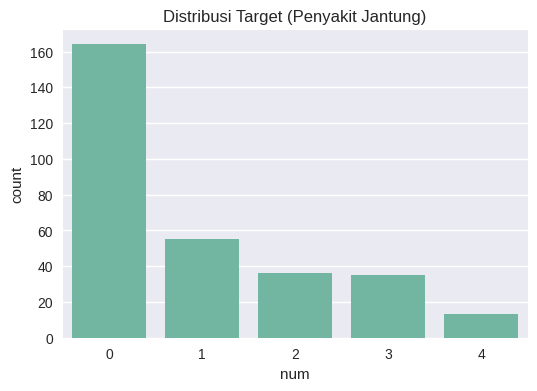

In [ ]:
# Distribusi Target (Kolom 'num' pada UCI Heart Disease menunjukkan level penyakit 0-4)
plt.figure(figsize=(6,4))
sns.countplot(x='num', data=df)
plt.title('Distribusi Target (Penyakit Jantung)')
plt.show()

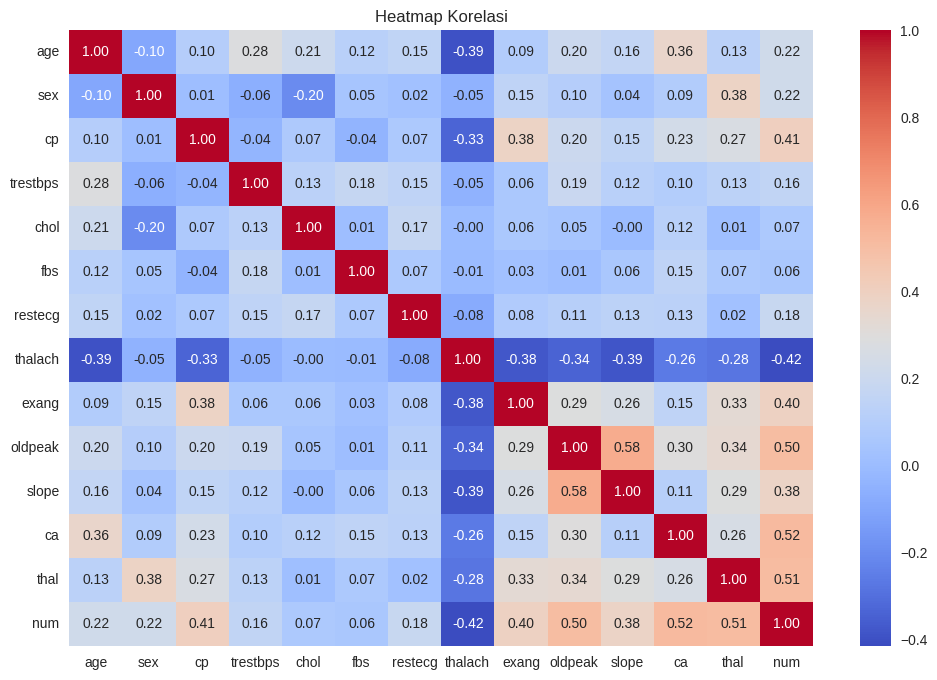

In [ ]:
# Korelasi Antar Fitur
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
print("Pengecekan Missing Values per Kolom:")
print(df.isnull().sum())

df['ca'] = df['ca'].fillna(df['ca'].median())
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

print("\n---")
print(f"Total Missing Values setelah penanganan: {df.isnull().sum().sum()}")

Pengecekan Missing Values per Kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

---
Total Missing Values setelah penanganan: 0


Jumlah data duplikat yang ditemukan: 0


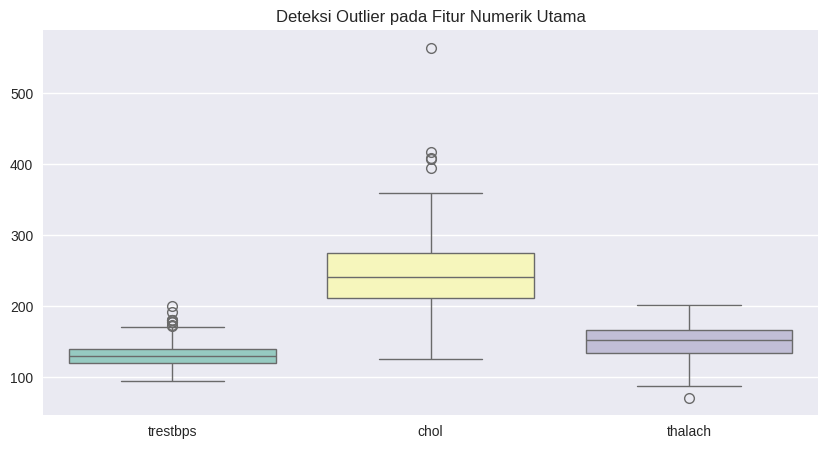

In [ ]:
# 2. Menghapus Data Duplikat & Visualisasi Outlier
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat yang ditemukan: {duplicate_count}")
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Data duplikat telah dihapus.")

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['trestbps', 'chol', 'thalach']], palette="Set3")
plt.title("Deteksi Outlier pada Fitur Numerik Utama")
plt.show()

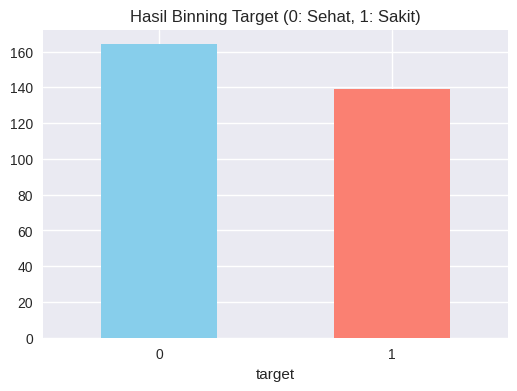

Status Encoding: Fitur kategorikal lain sudah dalam format numerik pada dataset ini.


In [ ]:
# 3. Encoding Data Kategorikal & Binarisasi Target (Binning)
if 'num' in df.columns:
    df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
    df.drop(columns=['num'], inplace=True)

plt.figure(figsize=(6, 4))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Hasil Binning Target (0: Sehat, 1: Sakit)")
plt.xticks(rotation=0)
plt.show()

print("Status Encoding: Fitur kategorikal lain sudah dalam format numerik pada dataset ini.")

In [ ]:
# 4. Normalisasi atau Standarisasi Fitur
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("Statistik Deskriptif setelah Standarisasi (Mean ~ 0, Std ~ 1):")
display(df[features_to_scale].describe().round(2))

Statistik Deskriptif setelah Standarisasi (Mean ~ 0, Std ~ 1):


,age,trestbps,chol,thalach,oldpeak
count,303.00,303.00,303.00,303.00,303.00
mean,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.82,-2.15,-2.33,-3.44,-0.90
25%,-0.71,-0.67,-0.69,-0.71,-0.90
50%,0.17,-0.10,-0.11,0.15,-0.21
75%,0.73,0.47,0.55,0.72,0.48
max,2.50,3.89,6.14,2.29,4.45


In [ ]:
# 5. Final Check & Ekspor Data
print("Struktur Data Akhir:")
df.info()

output_file = "heart_preprocessed.csv"
df.to_csv(output_file, index=False)

print(f"\n✅ Data Preprocessing selesai.")
print(f"📂 File '{output_file}' siap digunakan untuk tahap Modelling.")

Struktur Data Akhir:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 33.3 KB

✅ Data Preprocessing selesai.
📂 File 'heart_preprocessed.csv' siap digunakan untuk tahap Modelling.


In [ ]:
import os

# 1. Tentukan path utama
base_path = '/content/Eksperimen_SML_Eugenia Grasela Maia'

# 2. Hapus folder workflow lama jika ada untuk reset total
!rm -rf "{base_path}/.workflow"
!rm -rf "{base_path}/.github"

# 3. Buat ulang folder dengan struktur WAJIB Dicoding
os.makedirs(f'{base_path}/.workflow', exist_ok=True)
os.makedirs(f'{base_path}/.github/workflows', exist_ok=True) # Untuk pemicu GitHub Actions

print("Folder workflow lama berhasil dihapus dan direset.")

Folder workflow lama berhasil dihapus dan direset.


In [ ]:
%%writefile "/content/Eksperimen_SML_Eugenia Grasela Maia/preprocessing/automate_EugeniaGraselaMaia.py"
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os
import sys

def run_preprocessing():
    if os.path.exists("heart_raw/heart_raw.csv"):
        input_path = "heart_raw/heart_raw.csv"
        output_path = "preprocessing/heart_preprocessed.csv"
    elif os.path.exists("../heart_raw/heart_raw.csv"):
        input_path = "../heart_raw/heart_raw.csv"
        output_path = "heart_preprocessed.csv"
    else:
        print("ERROR: Dataset heart_raw.csv tidak ditemukan!")
        sys.exit(1)

    # Load Data
    df = pd.read_csv(input_path)

    # Preprocessing
    df['ca'] = df['ca'].fillna(df['ca'].median())
    df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
    df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
    df.drop(columns=['num'], inplace=True)

    scaler = StandardScaler()
    numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Save
    df.to_csv(output_path, index=False)
    print(f"Preprocessing Berhasil! Disimpan di: {output_path}")

if __name__ == "__main__":
    run_preprocessing()

Overwriting /content/Eksperimen_SML_Eugenia Grasela Maia/preprocessing/automate_EugeniaGraselaMaia.py


In [ ]:
workflow_content = """name: Heart Disease Preprocessing Workflow

on:
  push:
    paths:
      - 'heart_raw/heart_raw.csv'
      - 'preprocessing/automate_EugeniaGraselaMaia.py'
  workflow_dispatch:

permissions:
  contents: write

jobs:
  data-processing:
    runs-on: ubuntu-latest
    steps:
      - name: Checkout Repository
        uses: actions/checkout@v3

      - name: Set up Python
        uses: actions/setup-python@v4
        with:
          python-version: '3.9'

      - name: Install Dependencies
        run: pip install pandas scikit-learn

      - name: Run Preprocessing Script
        run: python preprocessing/automate_EugeniaGraselaMaia.py

      - name: Commit and Push Results
        run: |
          git config --local user.email "eugeniamaiaaa@gmail.com"
          git config --local user.name "maiamaiaa"
          git add preprocessing/heart_preprocessed.csv
          git commit -m "Automated: Update preprocessed data by Eugenia" || echo "No changes to commit"
          git push
"""
with open(f"{base_path}/.workflow/preprocessing.yml", "w") as f:
    f.write(workflow_content)

with open(f"{base_path}/.github/workflows/preprocessing.yml", "w") as f:
    f.write(workflow_content)

print("File workflow berhasil dibuat ulang di kedua lokasi.")

File workflow berhasil dibuat ulang di kedua lokasi.


In [ ]:
%cd "/content/Eksperimen_SML_Eugenia Grasela Maia"

!git config --local user.email "eugeniamaiaaa@gmail.com"
!git config --local user.name "maiamaiaa"

!git add .
!git commit -m "Reset: Clean workflow and automation scripts"
!git push origin main --force

/content/Eksperimen_SML_Eugenia Grasela Maia
[main 5e7b291] Reset: Clean workflow and automation scripts
 3 files changed, 16 insertions(+), 6 deletions(-)
Enumerating objects: 13, done.
Counting objects: 100% (13/13), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (7/7), 874 bytes | 874.00 KiB/s, done.
Total 7 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/maiamaiaa/Eksperimen_SML_EugeniaGraselaMaia.git
   a1287b2..5e7b291  main -> main
